In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts
import seaborn as sns

In [2]:
filepath = "Vertical_Merge.csv"
df = pd.read_csv(filepath)
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [3]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social Support', 'Health Life Expectancy',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [4]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,78.482869,5.392959,0.916999,1.034541,0.617602,0.472209,0.224981,0.180419,2017.485011
std,45.005361,1.124630,0.373876,0.321271,0.229263,0.201976,0.254946,0.154060,1.709092
min,1.000000,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,2015.000000
25%,40.000000,4.537500,0.689693,0.819287,0.500843,0.339463,0.061039,0.098123,2016.000000
50%,78.500000,5.350250,0.966694,1.035210,0.653114,0.465965,0.110800,0.182975,2017.000000
75%,117.000000,6.196500,1.181428,1.281355,0.779022,0.585893,0.285300,0.262000,2019.000000
max,158.000000,7.808700,1.870766,1.644000,1.141000,0.974998,0.935585,0.838075,2020.000000


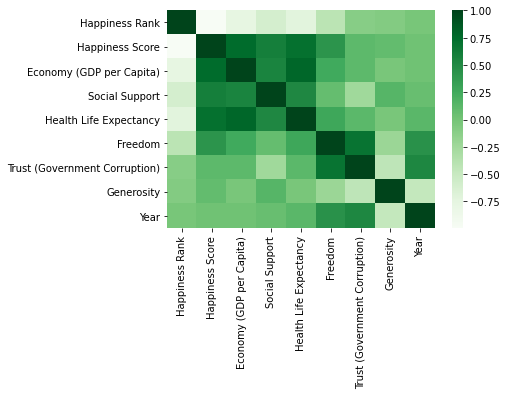

In [5]:
corrs = df.corr()
sns.heatmap(corrs, cmap="Greens")
plt.savefig("Images/Heatmaps/Happiness Correlation Heat Map.png")
plt.show()

y = 0.25x + -0.44
The r-squared is: 0.5746619353130298


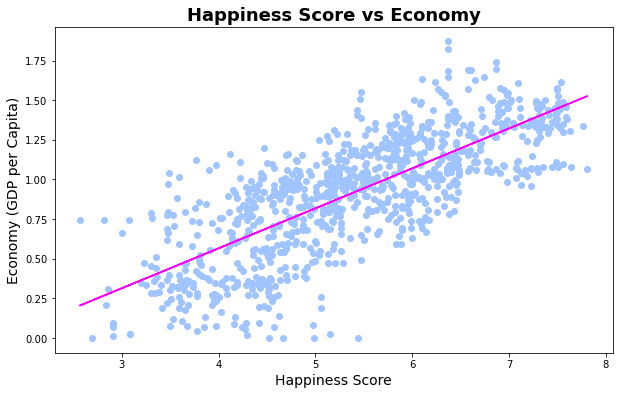

In [6]:
#all year Economy
x_value = df["Happiness Score"]
y_value = df["Economy (GDP per Capita)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Economy", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Economy (GDP per Capita)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Economy.png")
plt.show()

In [7]:
# STATSMODELS Economy All Year
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Economy (GDP per Capita)   R-squared:                       0.575
Model:                                  OLS   Adj. R-squared:                  0.574
Method:                       Least Squares   F-statistic:                     1259.
Date:                      Fri, 13 Nov 2020   Prob (F-statistic):          3.37e-175
Time:                              18:02:44   Log-Likelihood:                -6.6648
No. Observations:                       934   AIC:                             17.33
Df Residuals:                           932   BIC:                             27.01
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4421      0.039    -11.300      0.000      -0.519      -0.365
Happiness Score     0.2520      0.007     35.485      0.000       0.238       0.266
==============================================================================
Omnibus:                        6.608   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.532
Skew:                          -0.202   Prob(JB):                       0.0382
Kurtosis:                       3.064   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.17x + 0.12
The r-squared is: 0.35581658940803557


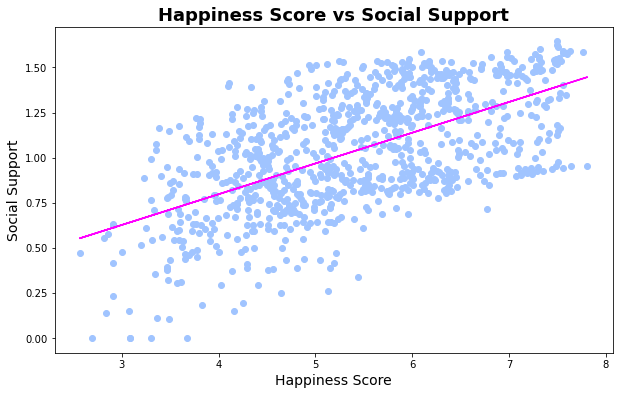

In [8]:
#all year Social Support
x_value = df["Happiness Score"]
y_value = df["Social Support"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Social Support", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Social Support", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Social Support.png")
plt.show()


In [9]:
# STATSMODELS Social Support All Year
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Social Support   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     514.8
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.36e-91
Time:                        18:02:44   Log-Likelihood:                -58.885
No. Observations:                 934   AIC:                             121.8
Df Residuals:                     932   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1156      0.041      2.793      0.005       0.034       0.197
Happiness Score     0.1704      0.008     22.689      0.000       0.156       0.185
==============================================================================
Omnibus:                       34.036   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.327
Skew:                          -0.186   Prob(JB):                     6.35e-05
Kurtosis:                       2.401   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.15x + -0.17
The r-squared is: 0.5102727800366699


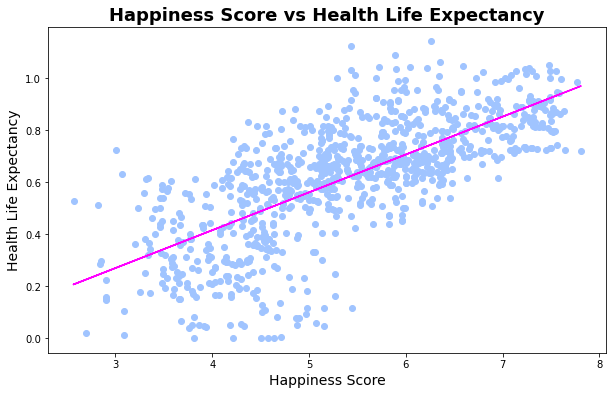

In [10]:
#all year Life Expectancy
x_value = df["Happiness Score"]
y_value = df["Health Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Health Life Expectancy", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Health Life Expectancy", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Health.png")
plt.show()


In [11]:
# STATSMODELS Life Expectancy All year
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Health Life Expectancy   R-squared:                       0.510
Model:                                OLS   Adj. R-squared:                  0.510
Method:                     Least Squares   F-statistic:                     971.1
Date:                    Fri, 13 Nov 2020   Prob (F-statistic):          1.21e-146
Time:                            18:02:44   Log-Likelihood:                 384.28
No. Observations:                     934   AIC:                            -764.6
Df Residuals:                         932   BIC:                            -754.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1677      0.026     -6.516      0.000      -0.218      -0.117
Happiness Score     0.1456      0.005     31.162      0.000       0.136       0.155
==============================================================================
Omnibus:                       24.331   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.649
Skew:                          -0.299   Prob(JB):                     2.21e-07
Kurtosis:                       3.656   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.08x + 0.06
The r-squared is: 0.18323429122204685


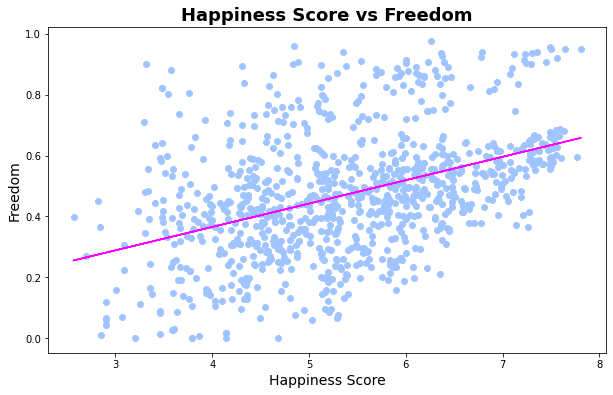

In [12]:
#all year Freedom
x_value = df["Happiness Score"]
y_value = df["Freedom"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Freedom", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Freedom", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Freedom.png")
plt.show()


In [13]:
# STATSMODELS Freedom All Year
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freedom   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     209.1
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           6.62e-43
Time:                        18:02:45   Log-Likelihood:                 263.77
No. Observations:                 934   AIC:                            -523.5
Df Residuals:                     932   BIC:                            -513.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0576      0.029      1.967      0.049       0.000       0.115
Happiness Score     0.0769      0.005     14.460      0.000       0.066       0.087
==============================================================================
Omnibus:                       35.311   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.636
Skew:                           0.498   Prob(JB):                     4.08e-09
Kurtosis:                       3.033   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.03x + 0.08
The r-squared is: 0.01443365688532854


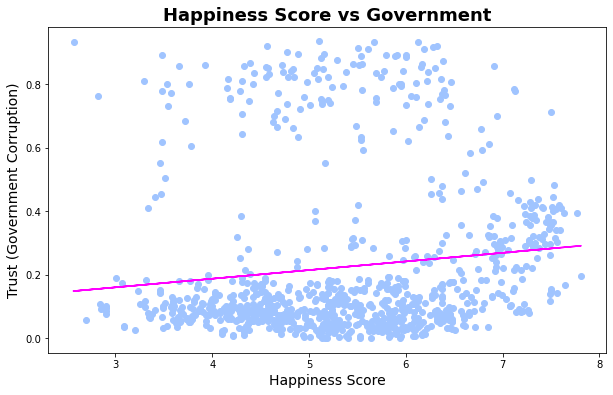

In [14]:
#all year Government
x_value = df["Happiness Score"]
y_value = df["Trust (Government Corruption)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Government", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Trust (Government Corruption)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Government.png")
plt.show()


In [15]:
# STATSMODELS Goverment All Year
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Trust (Government Corruption)   R-squared:                       0.014
Model:                                       OLS   Adj. R-squared:                  0.013
Method:                            Least Squares   F-statistic:                     13.65
Date:                           Fri, 13 Nov 2020   Prob (F-statistic):           0.000233
Time:                                   18:02:45   Log-Likelihood:                -41.497
No. Observations:                            934   AIC:                             86.99
Df Residuals:                                932   BIC:                             96.67
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0781      0.041      1.923      0.055      -0.002       0.158
Happiness Score     0.0272      0.007      3.694      0.000       0.013       0.042
==============================================================================
Omnibus:                      246.829   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.757
Skew:                           1.615   Prob(JB):                    2.20e-103
Kurtosis:                       4.311   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.01x + 0.12
The r-squared is: 0.0072579010309100495


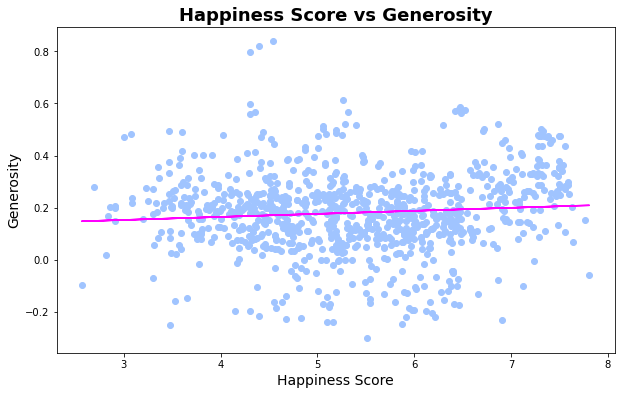

In [16]:
#all year Generosity
x_value = df["Happiness Score"]
y_value = df["Generosity"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Generosity", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Generosity", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Generosity.png")
plt.show()


In [17]:
# STATSMODELS Generosity All Year
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.814
Date:                Fri, 13 Nov 2020   Prob (F-statistic):            0.00919
Time:                        18:02:45   Log-Likelihood:                 425.58
No. Observations:                 934   AIC:                            -847.2
Df Residuals:                     932   BIC:                            -837.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1175      0.025      4.770      0.000       0.069       0.166
Happiness Score     0.0117      0.004      2.610      0.009       0.003       0.020
==============================================================================
Omnibus:                       28.411   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.327
Skew:                           0.025   Prob(JB):                     2.40e-15
Kurtosis:                       4.314   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2015 year scatterplot one for each group

In [18]:
df2015 = df.loc[df["Year"] == 2015]

y = 0.27x + -0.63
The r-squared is: 0.6099071541531218


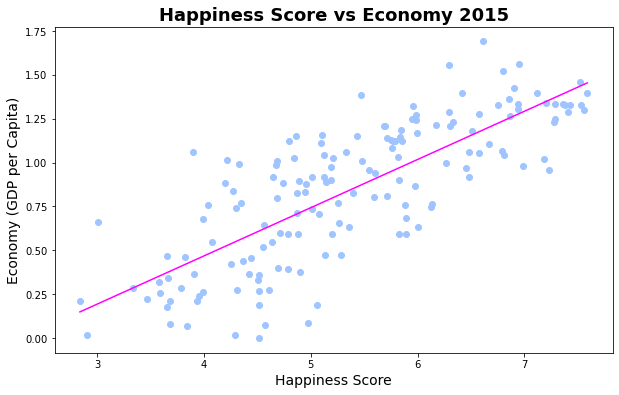

In [19]:
#2015 Economy
x_value = df2015["Happiness Score"]
y_value = df2015["Economy (GDP per Capita)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Economy 2015", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Economy (GDP per Capita)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Economy 2015.png")
plt.show()

In [20]:
# STATSMODELS Economy 2015
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Economy (GDP per Capita)   R-squared:                       0.610
Model:                                  OLS   Adj. R-squared:                  0.607
Method:                       Least Squares   F-statistic:                     243.9
Date:                      Fri, 13 Nov 2020   Prob (F-statistic):           1.05e-33
Time:                              18:02:45   Log-Likelihood:                -5.7764
No. Observations:                       158   AIC:                             15.55
Df Residuals:                           156   BIC:                             21.68
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6319      0.097     -6.531      0.000      -0.823      -0.441
Happiness Score     0.2750      0.018     15.617      0.000       0.240       0.310
==============================================================================
Omnibus:                        0.945   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.996
Skew:                          -0.084   Prob(JB):                        0.608
Kurtosis:                       2.649   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.18x + 0.04
The r-squared is: 0.5484960581741367


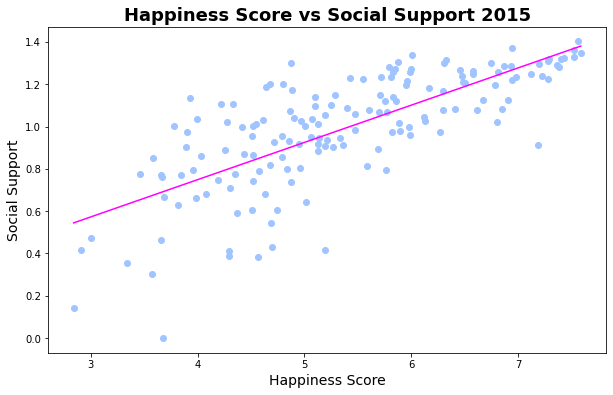

In [21]:
#all year Social Support
x_value = df2015["Happiness Score"]
y_value = df2015["Social Support"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Social Support 2015", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Social Support", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Social Support 2015.png")
plt.show()


In [22]:
# STATSMODELS Social Support 2015
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Social Support   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     189.5
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           9.92e-29
Time:                        18:02:46   Log-Likelihood:                 44.622
No. Observations:                 158   AIC:                            -85.24
Df Residuals:                     156   BIC:                            -79.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0440      0.070      0.626      0.533      -0.095       0.183
Happiness Score     0.1762      0.013     13.766      0.000       0.151       0.201
==============================================================================
Omnibus:                       17.540   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.192
Skew:                          -0.691   Prob(JB):                     1.52e-05
Kurtosis:                       4.208   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.16x + -0.21
The r-squared is: 0.5244650535503468


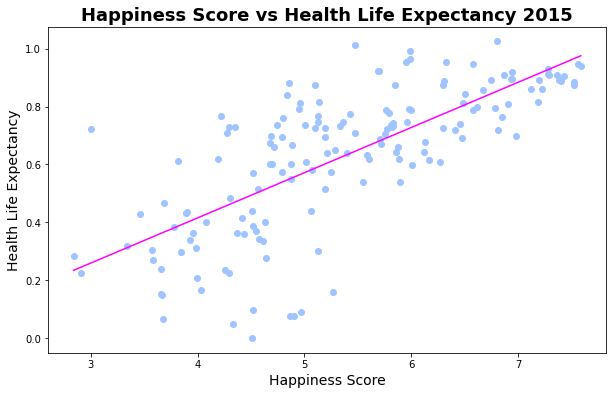

In [23]:
#2015 Life Expectancy
x_value = df2015["Happiness Score"]
y_value = df2015["Health Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Health Life Expectancy 2015", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Health Life Expectancy", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Health 2015.png")
plt.show()


In [24]:
# STATSMODELS Life Expectancy 2015
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Health Life Expectancy   R-squared:                       0.524
Model:                                OLS   Adj. R-squared:                  0.521
Method:                     Least Squares   F-statistic:                     172.1
Date:                    Fri, 13 Nov 2020   Prob (F-statistic):           5.79e-27
Time:                            18:02:46   Log-Likelihood:                 55.923
No. Observations:                     158   AIC:                            -107.8
Df Residuals:                         156   BIC:                            -101.7
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2098      0.065     -3.205      0.002      -0.339      -0.080
Happiness Score     0.1563      0.012     13.117      0.000       0.133       0.180
==============================================================================
Omnibus:                        9.192   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               10.388
Skew:                          -0.432   Prob(JB):                      0.00555
Kurtosis:                       3.911   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.07x + 0.03
The r-squared is: 0.32286363164327897


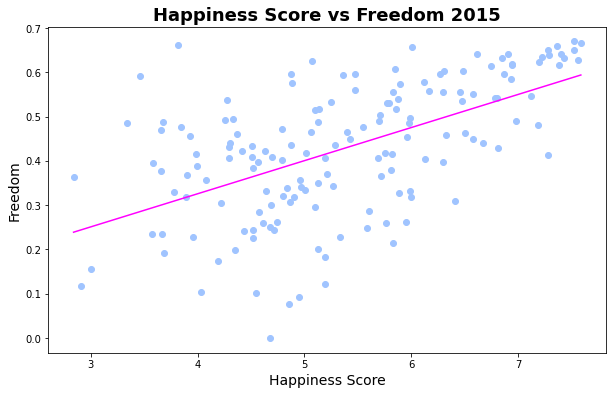

In [25]:
#2015 Freedom
x_value = df2015["Happiness Score"]
y_value = df2015["Freedom"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Freedom 2015", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Freedom", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Freedom 2015.png")
plt.show()


In [26]:
# STATSMODELS Freedom 2015
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freedom   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     74.38
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           6.88e-15
Time:                        18:02:46   Log-Likelihood:                 106.13
No. Observations:                 158   AIC:                            -208.3
Df Residuals:                     156   BIC:                            -202.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0266      0.048      0.558      0.577      -0.068       0.121
Happiness Score     0.0748      0.009      8.624      0.000       0.058       0.092
==============================================================================
Omnibus:                        4.585   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.139
Skew:                          -0.378   Prob(JB):                        0.126
Kurtosis:                       3.237   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.04x + -0.08
The r-squared is: 0.1561819206667


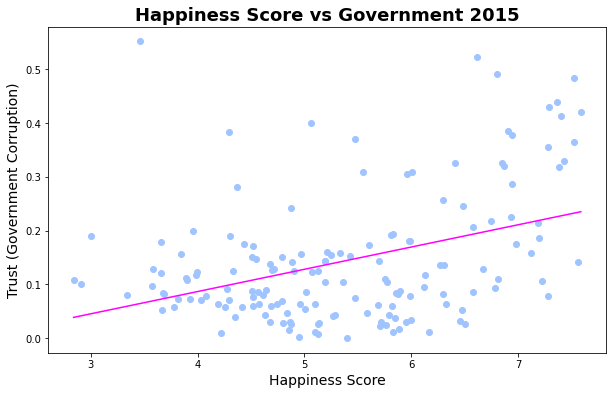

In [27]:
#2015 Government
x_value = df2015["Happiness Score"]
y_value = df2015["Trust (Government Corruption)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Government 2015", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Trust (Government Corruption)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Government 2015.png")
plt.show()


In [28]:
# STATSMODELS Goverment 2015
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Trust (Government Corruption)   R-squared:                       0.156
Model:                                       OLS   Adj. R-squared:                  0.151
Method:                            Least Squares   F-statistic:                     28.87
Date:                           Fri, 13 Nov 2020   Prob (F-statistic):           2.76e-07
Time:                                   18:02:46   Log-Likelihood:                 124.68
No. Observations:                            158   AIC:                            -245.4
Df Residuals:                                156   BIC:                            -239.2
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0793      0.042     -1.871      0.063      -0.163       0.004
Happiness Score     0.0414      0.008      5.373      0.000       0.026       0.057
==============================================================================
Omnibus:                       38.054   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.466
Skew:                           1.184   Prob(JB):                     1.00e-14
Kurtosis:                       5.046   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.02x + 0.13
The r-squared is: 0.03251477107023956


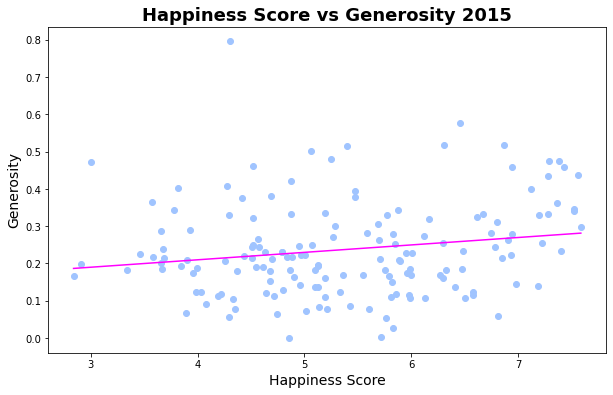

In [29]:
#2015 Generosity
x_value = df2015["Happiness Score"]
y_value = df2015["Generosity"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Generosity 2015", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Generosity", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Generosity 2015.png")
plt.show()


In [30]:
# STATSMODELS Generosity 2015
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     5.243
Date:                Fri, 13 Nov 2020   Prob (F-statistic):             0.0234
Time:                        18:02:47   Log-Likelihood:                 105.36
No. Observations:                 158   AIC:                            -206.7
Df Residuals:                     156   BIC:                            -200.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1300      0.048      2.716      0.007       0.035       0.225
Happiness Score     0.0200      0.009      2.290      0.023       0.003       0.037
==============================================================================
Omnibus:                       33.624   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.125
Skew:                           1.024   Prob(JB):                     1.45e-13
Kurtosis:                       5.188   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2016 year scatterplot one for each group

In [31]:
df2016 = df.loc[df["Year"] == 2016]

y = 0.29x + -0.58
The r-squared is: 0.6246088901220196


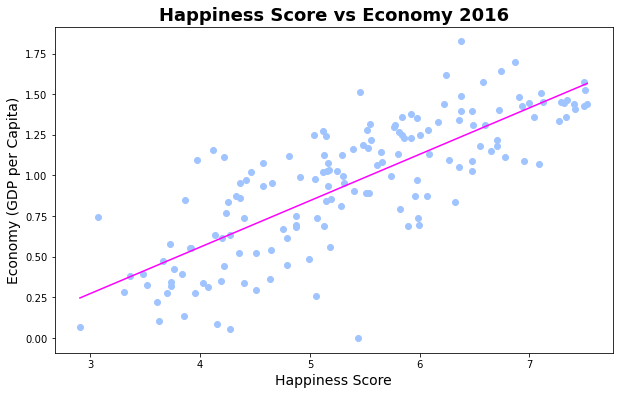

In [32]:
#2016 Economy
x_value = df2016["Happiness Score"]
y_value = df2016["Economy (GDP per Capita)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Economy 2016", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Economy (GDP per Capita)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Economy 2016.png")
plt.show()

In [33]:
# STATSMODELS Economy 2016
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Economy (GDP per Capita)   R-squared:                       0.625
Model:                                  OLS   Adj. R-squared:                  0.622
Method:                       Least Squares   F-statistic:                     257.9
Date:                      Fri, 13 Nov 2020   Prob (F-statistic):           8.49e-35
Time:                              18:02:47   Log-Likelihood:                -6.3683
No. Observations:                       157   AIC:                             16.74
Df Residuals:                           155   BIC:                             22.85
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5834      0.098     -5.963      0.000      -0.777      -0.390
Happiness Score     0.2856      0.018     16.059      0.000       0.250       0.321
==============================================================================
Omnibus:                        4.778   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.657
Skew:                          -0.283   Prob(JB):                       0.0974
Kurtosis:                       3.625   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.17x + -0.14
The r-squared is: 0.5464928946987405


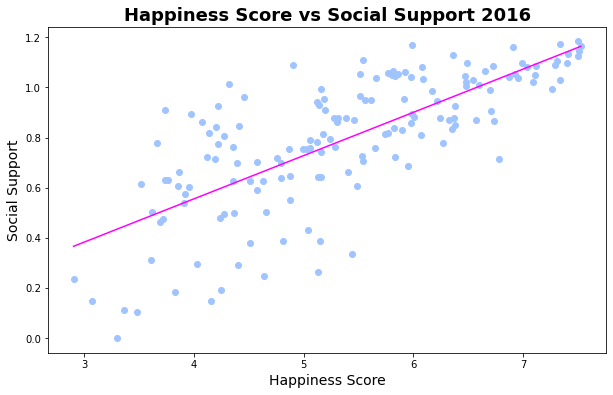

In [34]:
#all year Social Support
x_value = df2016["Happiness Score"]
y_value = df2016["Social Support"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Social Support 2016", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Social Support", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Social Support 2016.png")
plt.show()


In [35]:
# STATSMODELS Social Support 2016
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Social Support   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     186.8
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           2.09e-28
Time:                        18:02:47   Log-Likelihood:                 47.294
No. Observations:                 157   AIC:                            -90.59
Df Residuals:                     155   BIC:                            -84.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1359      0.070     -1.954      0.052      -0.273       0.001
Happiness Score     0.1727      0.013     13.667      0.000       0.148       0.198
==============================================================================
Omnibus:                        5.348   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.887
Skew:                          -0.403   Prob(JB):                       0.0869
Kurtosis:                       3.311   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.15x + -0.27
The r-squared is: 0.585813179396469


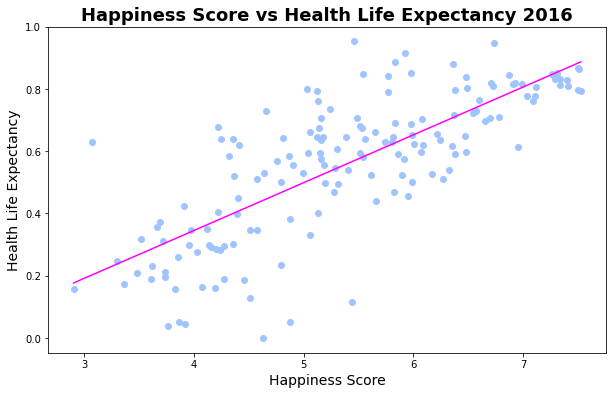

In [36]:
#2016 Life Expectancy
x_value = df2016["Happiness Score"]
y_value = df2016["Health Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Health Life Expectancy 2016", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Health Life Expectancy", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Health 2016.png")
plt.show()


In [37]:
# STATSMODELS Life Expectancy 2016
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Health Life Expectancy   R-squared:                       0.586
Model:                                OLS   Adj. R-squared:                  0.583
Method:                     Least Squares   F-statistic:                     219.2
Date:                    Fri, 13 Nov 2020   Prob (F-statistic):           1.79e-31
Time:                            18:02:48   Log-Likelihood:                 78.105
No. Observations:                     157   AIC:                            -152.2
Df Residuals:                         155   BIC:                            -146.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2699      0.057     -4.725      0.000      -0.383      -0.157
Happiness Score     0.1538      0.010     14.806      0.000       0.133       0.174
==============================================================================
Omnibus:                        4.335   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                5.543
Skew:                          -0.068   Prob(JB):                       0.0626
Kurtosis:                       3.910   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.07x + -0.02
The r-squared is: 0.32129247733409244


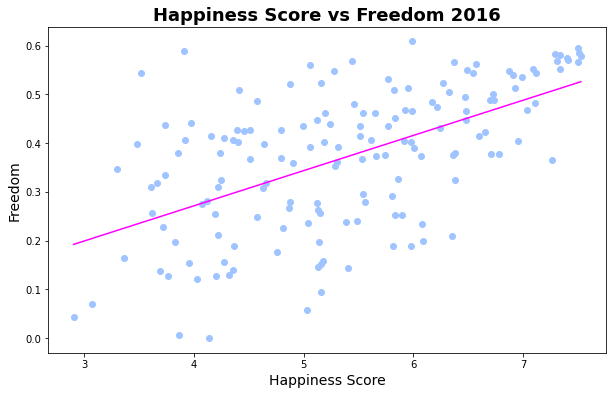

In [38]:
#2016 Freedom
x_value = df2016["Happiness Score"]
y_value = df2016["Freedom"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Freedom 2016", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Freedom", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Freedom 2016.png")
plt.show()


In [39]:
# STATSMODELS Freedom 2016
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freedom   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     73.38
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.01e-14
Time:                        18:02:48   Log-Likelihood:                 110.77
No. Observations:                 157   AIC:                            -217.5
Df Residuals:                     155   BIC:                            -211.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0178      0.046     -0.384      0.701      -0.109       0.074
Happiness Score     0.0722      0.008      8.566      0.000       0.056       0.089
==============================================================================
Omnibus:                        1.621   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                1.702
Skew:                          -0.222   Prob(JB):                        0.427
Kurtosis:                       2.748   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.04x + -0.07
The r-squared is: 0.16162992613817256


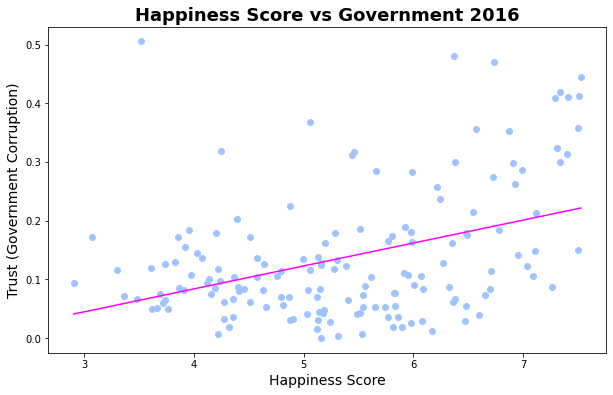

In [40]:
#2016 Government
x_value = df2016["Happiness Score"]
y_value = df2016["Trust (Government Corruption)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Government 2016", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Trust (Government Corruption)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Government 2016.png")
plt.show()


In [41]:
# STATSMODELS Goverment 2016
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Trust (Government Corruption)   R-squared:                       0.162
Model:                                       OLS   Adj. R-squared:                  0.156
Method:                            Least Squares   F-statistic:                     29.88
Date:                           Fri, 13 Nov 2020   Prob (F-statistic):           1.80e-07
Time:                                   18:02:48   Log-Likelihood:                 136.64
No. Observations:                            157   AIC:                            -269.3
Df Residuals:                                155   BIC:                            -263.2
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0728      0.039     -1.851      0.066      -0.151       0.005
Happiness Score     0.0391      0.007      5.466      0.000       0.025       0.053
==============================================================================
Omnibus:                       34.691   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.115
Skew:                           1.125   Prob(JB):                     1.08e-12
Kurtosis:                       4.833   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.02x + 0.14
The r-squared is: 0.024601231236667645


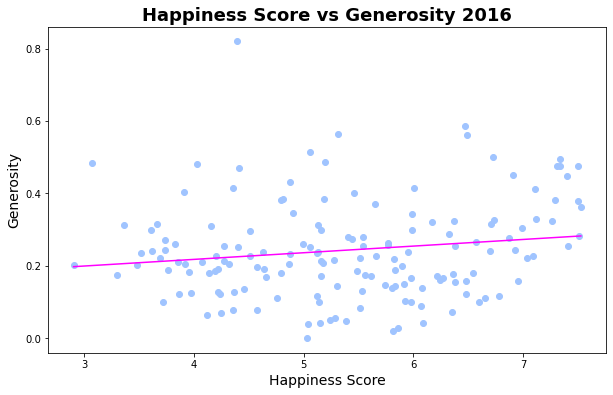

In [42]:
#2016 Generosity
x_value = df2016["Happiness Score"]
y_value = df2016["Generosity"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Generosity 2016", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Generosity", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Generosity 2016.png")
plt.show()


In [43]:
# STATSMODELS Generosity 2016
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.909
Date:                Fri, 13 Nov 2020   Prob (F-statistic):             0.0498
Time:                        18:02:48   Log-Likelihood:                 95.527
No. Observations:                 157   AIC:                            -187.1
Df Residuals:                     155   BIC:                            -180.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1437      0.051      2.811      0.006       0.043       0.245
Happiness Score     0.0184      0.009      1.977      0.050     1.7e-05       0.037
==============================================================================
Omnibus:                       29.264   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.202
Skew:                           0.954   Prob(JB):                     9.28e-11
Kurtosis:                       4.849   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2017 year scatterplot one for each group

In [44]:
df2017 = df.loc[df["Year"] == 2017]

y = 0.3x + -0.63
The r-squared is: 0.6601054760421113


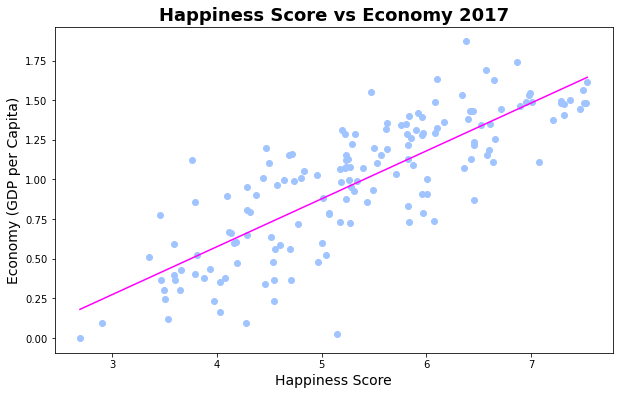

In [45]:
#2017 Economy
x_value = df2017["Happiness Score"]
y_value = df2017["Economy (GDP per Capita)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Economy 2017", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Economy (GDP per Capita)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Economy 2017.png")
plt.show()

In [46]:
# STATSMODELS Economy 2017
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Economy (GDP per Capita)   R-squared:                       0.660
Model:                                  OLS   Adj. R-squared:                  0.658
Method:                       Least Squares   F-statistic:                     297.1
Date:                      Fri, 13 Nov 2020   Prob (F-statistic):           1.11e-37
Time:                              18:02:49   Log-Likelihood:                -1.6317
No. Observations:                       155   AIC:                             7.263
Df Residuals:                           153   BIC:                             13.35
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6334      0.096     -6.603      0.000      -0.823      -0.444
Happiness Score     0.3022      0.018     17.238      0.000       0.268       0.337
==============================================================================
Omnibus:                        3.040   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                2.577
Skew:                          -0.242   Prob(JB):                        0.276
Kurtosis:                       3.405   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.19x + 0.17
The r-squared is: 0.5666124984216682


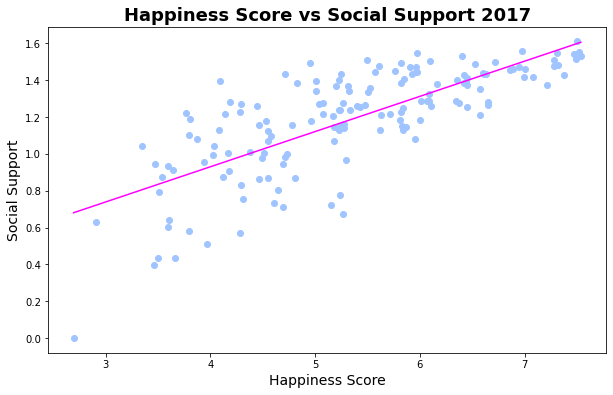

In [47]:
#all year Social Support
x_value = df2017["Happiness Score"]
y_value = df2017["Social Support"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Social Support 2017", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Social Support", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Social Support 2017.png")
plt.show()


In [48]:
# STATSMODELS Social Support 2017
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Social Support   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     200.0
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.42e-29
Time:                        18:02:49   Log-Likelihood:                 38.706
No. Observations:                 155   AIC:                            -73.41
Df Residuals:                     153   BIC:                            -67.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1655      0.074      2.238      0.027       0.019       0.312
Happiness Score     0.1911      0.014     14.143      0.000       0.164       0.218
==============================================================================
Omnibus:                       10.724   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.413
Skew:                          -0.541   Prob(JB):                      0.00332
Kurtosis:                       3.774   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.16x + -0.33
The r-squared is: 0.611446779623559


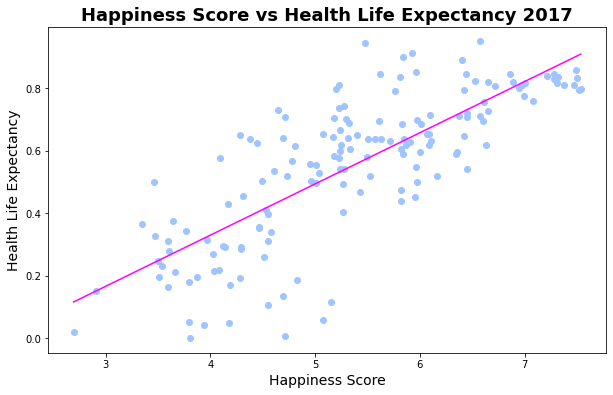

In [49]:
#2017 Life Expectancy
x_value = df2017["Happiness Score"]
y_value = df2017["Health Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Health Life Expectancy 2017", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Health Life Expectancy", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Health 2017.png")
plt.show()


In [50]:
# STATSMODELS Life Expectancy 2017
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Health Life Expectancy   R-squared:                       0.611
Model:                                OLS   Adj. R-squared:                  0.609
Method:                     Least Squares   F-statistic:                     240.8
Date:                    Fri, 13 Nov 2020   Prob (F-statistic):           3.21e-33
Time:                            18:02:49   Log-Likelihood:                 76.934
No. Observations:                     155   AIC:                            -149.9
Df Residuals:                         153   BIC:                            -143.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3260      0.058     -5.642      0.000      -0.440      -0.212
Happiness Score     0.1639      0.011     15.517      0.000       0.143       0.185
==============================================================================
Omnibus:                        4.272   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.079
Skew:                          -0.261   Prob(JB):                        0.130
Kurtosis:                       3.599   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.08x + 0.0
The r-squared is: 0.3250564195232413


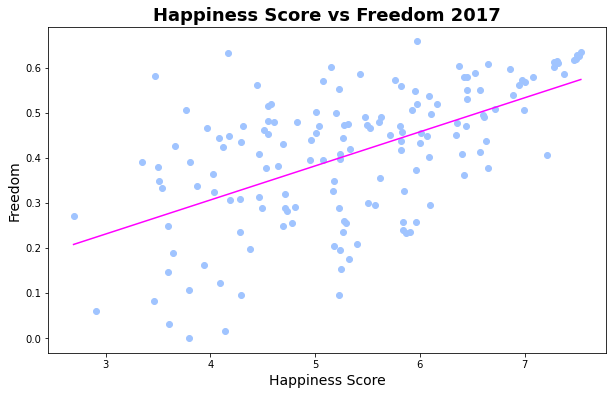

In [51]:
#2017 Freedom
x_value = df2017["Happiness Score"]
y_value = df2017["Freedom"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Freedom 2017", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Freedom", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Freedom 2017.png")
plt.show()


In [52]:
# STATSMODELS Freedom 2017
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freedom   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     73.69
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           9.69e-15
Time:                        18:02:49   Log-Likelihood:                 105.09
No. Observations:                 155   AIC:                            -206.2
Df Residuals:                     153   BIC:                            -200.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0040      0.048      0.084      0.933      -0.091       0.099
Happiness Score     0.0756      0.009      8.584      0.000       0.058       0.093
==============================================================================
Omnibus:                        3.098   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                3.135
Skew:                          -0.335   Prob(JB):                        0.209
Kurtosis:                       2.806   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.04x + -0.08
The r-squared is: 0.18410942089464805


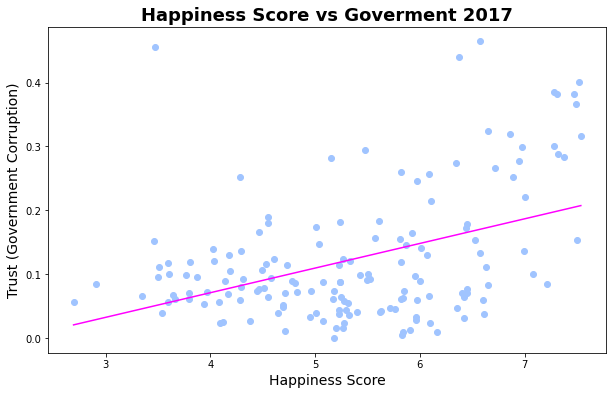

In [53]:
#2017 Government
x_value = df2017["Happiness Score"]
y_value = df2017["Trust (Government Corruption)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Goverment 2017", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Trust (Government Corruption)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Government 2017.png")
plt.show()


In [54]:
# STATSMODELS Goverment 2017
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Trust (Government Corruption)   R-squared:                       0.184
Model:                                       OLS   Adj. R-squared:                  0.179
Method:                            Least Squares   F-statistic:                     34.53
Date:                           Fri, 13 Nov 2020   Prob (F-statistic):           2.54e-08
Time:                                   18:02:50   Log-Likelihood:                 150.68
No. Observations:                            155   AIC:                            -297.4
Df Residuals:                                153   BIC:                            -291.3
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0833      0.036     -2.321      0.022      -0.154      -0.012
Happiness Score     0.0386      0.007      5.876      0.000       0.026       0.052
==============================================================================
Omnibus:                       35.991   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.861
Skew:                           1.125   Prob(JB):                     3.69e-14
Kurtosis:                       5.125   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.02x + 0.15
The r-squared is: 0.024104375578602445


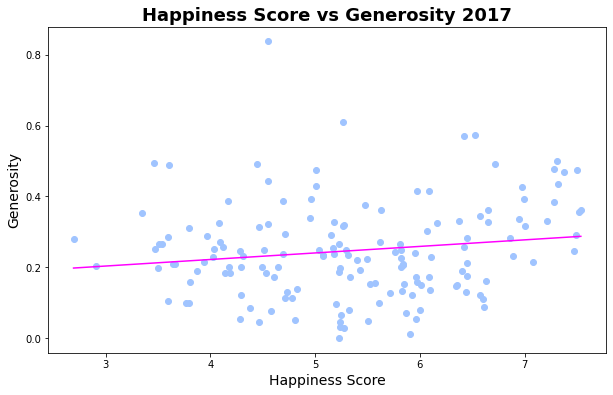

In [55]:
#2017 Generosity
x_value = df2017["Happiness Score"]
y_value = df2017["Generosity"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Generosity 2017", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Generosity", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Generosity 2017.png")
plt.show()


In [56]:
# STATSMODELS Generosity 2017
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.779
Date:                Fri, 13 Nov 2020   Prob (F-statistic):             0.0537
Time:                        18:02:50   Log-Likelihood:                 93.094
No. Observations:                 155   AIC:                            -182.2
Df Residuals:                     153   BIC:                            -176.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1478      0.052      2.840      0.005       0.045       0.251
Happiness Score     0.0185      0.010      1.944      0.054      -0.000       0.037
==============================================================================
Omnibus:                       28.139   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.801
Skew:                           0.900   Prob(JB):                     6.87e-11
Kurtosis:                       5.002   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2018 year scatterplot one for each group

In [57]:
df2018 = df.loc[df["Year"] == 2018]

y = 0.27x + -0.59
The r-squared is: 0.6500956458900138


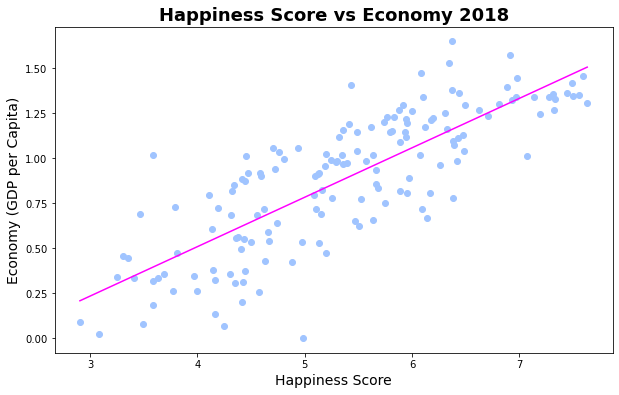

In [58]:
#2018 Economy
x_value = df2018["Happiness Score"]
y_value = df2018["Economy (GDP per Capita)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Economy 2018", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Economy (GDP per Capita)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Economy 2018.png")
plt.show()

In [59]:
# STATSMODELS Ecnomy 2018
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Economy (GDP per Capita)   R-squared:                       0.650
Model:                                  OLS   Adj. R-squared:                  0.648
Method:                       Least Squares   F-statistic:                     284.3
Date:                      Fri, 13 Nov 2020   Prob (F-statistic):           1.03e-36
Time:                              18:02:50   Log-Likelihood:                 11.540
No. Observations:                       155   AIC:                            -19.08
Df Residuals:                           153   BIC:                            -12.99
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5915      0.089     -6.619      0.000      -0.768      -0.415
Happiness Score     0.2749      0.016     16.860      0.000       0.243       0.307
==============================================================================
Omnibus:                        1.263   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.960
Skew:                          -0.183   Prob(JB):                        0.619
Kurtosis:                       3.123   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.21x + 0.11
The r-squared is: 0.587633577638797


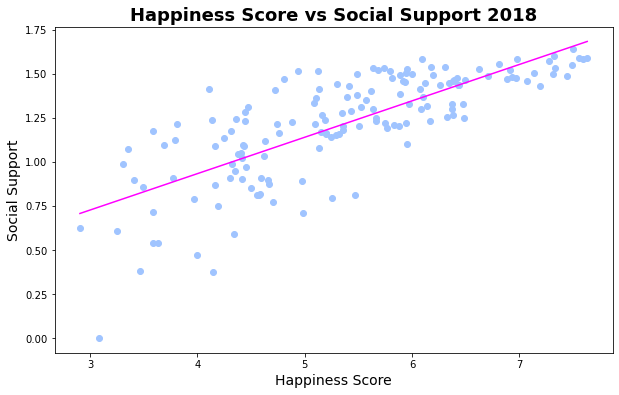

In [60]:
#all year Social Support
x_value = df2018["Happiness Score"]
y_value = df2018["Social Support"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Social Support 2018", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Social Support", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Social Support 2018.png")
plt.show()


In [61]:
# STATSMODELS Social Support 2018
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Social Support   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     218.0
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           3.10e-31
Time:                        18:02:50   Log-Likelihood:                 35.172
No. Observations:                 155   AIC:                            -66.34
Df Residuals:                     153   BIC:                            -60.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1068      0.077      1.392      0.166      -0.045       0.258
Happiness Score     0.2067      0.014     14.766      0.000       0.179       0.234
==============================================================================
Omnibus:                       14.446   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.187
Skew:                          -0.590   Prob(JB):                     0.000112
Kurtosis:                       4.193   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.17x + -0.33
The r-squared is: 0.6046580529855223


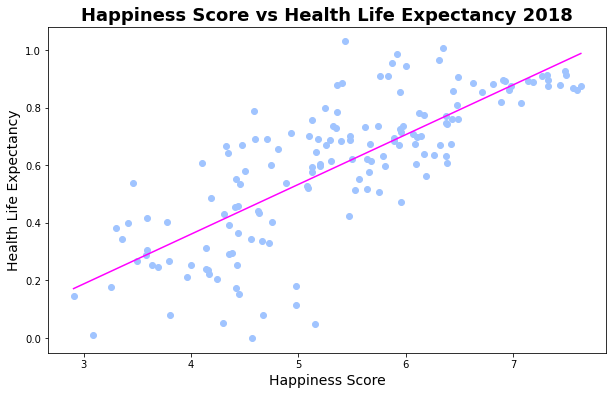

In [62]:
#2018 Life Expectancy
x_value = df2018["Happiness Score"]
y_value = df2018["Health Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Health Life Expectancy 2018", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Health Life Expectancy", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Life Expectancy 2018.png")
plt.show()


In [63]:
# STATSMODELS Life Expectancy 2018
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Health Life Expectancy   R-squared:                       0.605
Model:                                OLS   Adj. R-squared:                  0.602
Method:                     Least Squares   F-statistic:                     234.0
Date:                    Fri, 13 Nov 2020   Prob (F-statistic):           1.22e-32
Time:                            18:02:51   Log-Likelihood:                 68.412
No. Observations:                     155   AIC:                            -132.8
Df Residuals:                         153   BIC:                            -126.7
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3305      0.062     -5.338      0.000      -0.453      -0.208
Happiness Score     0.1728      0.011     15.297      0.000       0.150       0.195
==============================================================================
Omnibus:                        6.293   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.960
Skew:                          -0.307   Prob(JB):                       0.0308
Kurtosis:                       3.837   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.08x + 0.02
The r-squared is: 0.31093057090746673


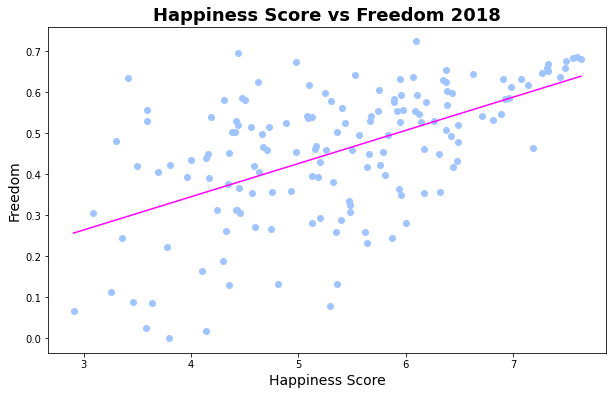

In [64]:
#2018 Freedom
x_value = df2018["Happiness Score"]
y_value = df2018["Freedom"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Freedom 2018", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Freedom", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Freedom 2018.png")
plt.show()


In [65]:
# STATSMODELS Freedom 2018
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freedom   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     69.04
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.83e-14
Time:                        18:02:51   Log-Likelihood:                 91.202
No. Observations:                 155   AIC:                            -178.4
Df Residuals:                     153   BIC:                            -172.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0208      0.053      0.389      0.698      -0.085       0.126
Happiness Score     0.0810      0.010      8.309      0.000       0.062       0.100
==============================================================================
Omnibus:                        4.571   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.305
Skew:                          -0.406   Prob(JB):                        0.116
Kurtosis:                       3.081   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.03x + -0.08
The r-squared is: 0.16426121838472427


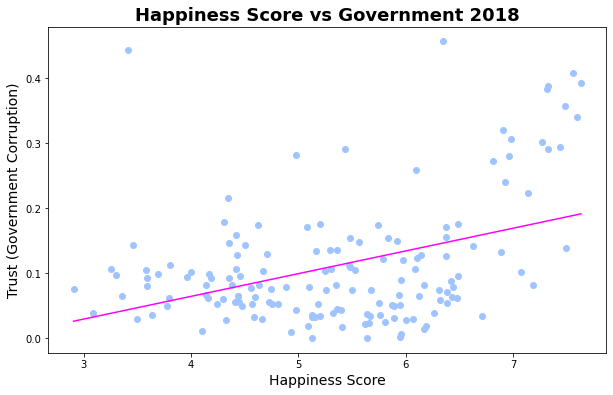

In [66]:
#2018 Government
x_value = df2018["Happiness Score"]
y_value = df2018["Trust (Government Corruption)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Government 2018", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Trust (Government Corruption)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Government 2018.png")
plt.show()


In [67]:
# STATSMODELS Goverment 2018
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Trust (Government Corruption)   R-squared:                       0.164
Model:                                       OLS   Adj. R-squared:                  0.159
Method:                            Least Squares   F-statistic:                     30.07
Date:                           Fri, 13 Nov 2020   Prob (F-statistic):           1.68e-07
Time:                                   18:02:51   Log-Likelihood:                 156.91
No. Observations:                            155   AIC:                            -309.8
Df Residuals:                                153   BIC:                            -303.7
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0758      0.035     -2.168      0.032      -0.145      -0.007
Happiness Score     0.0350      0.006      5.484      0.000       0.022       0.048
==============================================================================
Omnibus:                       45.063   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.900
Skew:                           1.310   Prob(JB):                     1.83e-20
Kurtosis:                       5.686   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.01x + 0.12
The r-squared is: 0.01852472674388778


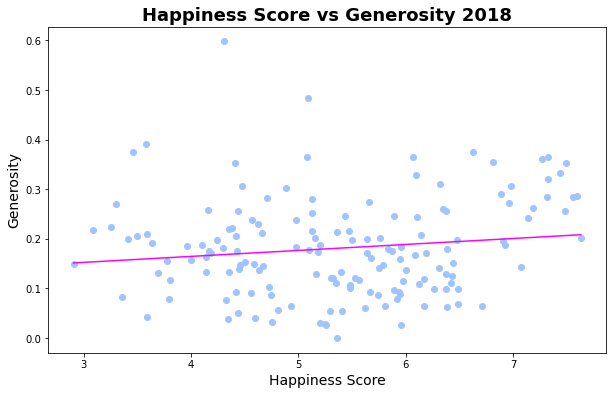

In [68]:
#2018 Generosity
x_value = df2018["Happiness Score"]
y_value = df2018["Generosity"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Generosity 2018", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Generosity", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Generosity 2018.png")
plt.show()


In [69]:
# STATSMODELS Generosity 2018
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.888
Date:                Fri, 13 Nov 2020   Prob (F-statistic):             0.0913
Time:                        18:02:51   Log-Likelihood:                 140.80
No. Observations:                 155   AIC:                            -277.6
Df Residuals:                     153   BIC:                            -271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1164      0.039      2.999      0.003       0.040       0.193
Happiness Score     0.0120      0.007      1.699      0.091      -0.002       0.026
==============================================================================
Omnibus:                       26.103   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.329
Skew:                           0.888   Prob(JB):                     2.88e-09
Kurtosis:                       4.713   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2019 year scatterplot one for each group

In [70]:
df2019 = df.loc[df["Year"] == 2019]

y = 0.28x + -0.63
The r-squared is: 0.6302500079104005


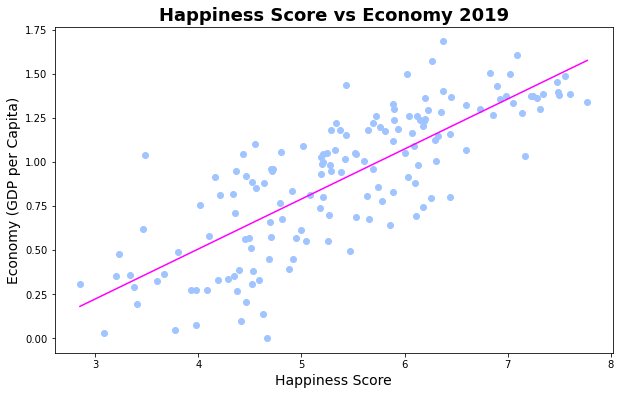

In [71]:
#2019 Economy
x_value = df2019["Happiness Score"]
y_value = df2019["Economy (GDP per Capita)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Economy 2019", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Economy (GDP per Capita)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Economy 2019.png")
plt.show()

In [72]:
# STATSMODELS Economy 2019
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Economy (GDP per Capita)   R-squared:                       0.630
Model:                                  OLS   Adj. R-squared:                  0.628
Method:                       Least Squares   F-statistic:                     262.5
Date:                      Fri, 13 Nov 2020   Prob (F-statistic):           4.32e-35
Time:                              18:02:52   Log-Likelihood:                0.32233
No. Observations:                       156   AIC:                             3.355
Df Residuals:                           154   BIC:                             9.455
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6312      0.097     -6.520      0.000      -0.822      -0.440
Happiness Score     0.2841      0.018     16.202      0.000       0.249       0.319
==============================================================================
Omnibus:                        0.751   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.878
Skew:                          -0.138   Prob(JB):                        0.645
Kurtosis:                       2.756   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.21x + 0.08
The r-squared is: 0.6038188059907057


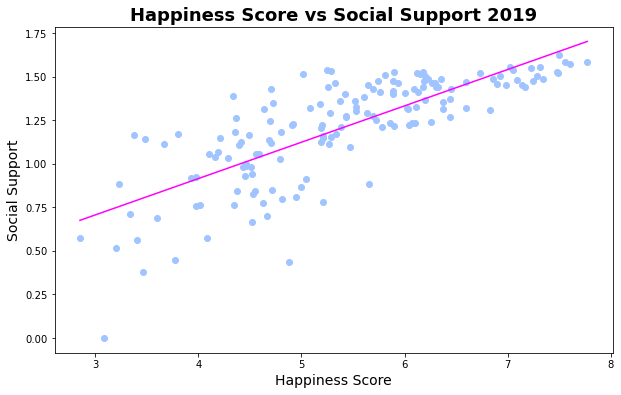

In [73]:
#all year Social Support
x_value = df2019["Happiness Score"]
y_value = df2019["Social Support"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Social Support 2019", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Social Support", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Social Support 2019.png")
plt.show()


In [74]:
# STATSMODELS Social Support 2019
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Social Support   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     234.7
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           8.98e-33
Time:                        18:02:52   Log-Likelihood:                 39.607
No. Observations:                 156   AIC:                            -75.21
Df Residuals:                     154   BIC:                            -69.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0795      0.075      1.056      0.293      -0.069       0.228
Happiness Score     0.2089      0.014     15.320      0.000       0.182       0.236
==============================================================================
Omnibus:                       17.124   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.198
Skew:                          -0.626   Prob(JB):                     5.57e-06
Kurtosis:                       4.469   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.17x + -0.19
The r-squared is: 0.6082177264725287


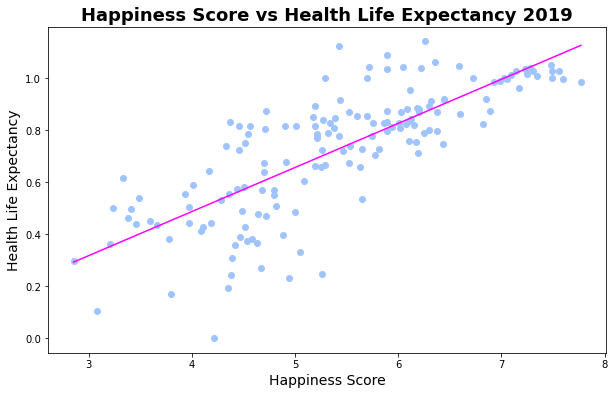

In [75]:
#2019 Life Expectancy
x_value = df2019["Happiness Score"]
y_value = df2019["Health Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Health Life Expectancy 2019", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Health Life Expectancy", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Health 2019.png")
plt.show()


In [76]:
# STATSMODELS Life Expectancy 2019
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Health Life Expectancy   R-squared:                       0.608
Model:                                OLS   Adj. R-squared:                  0.606
Method:                     Least Squares   F-statistic:                     239.1
Date:                    Fri, 13 Nov 2020   Prob (F-statistic):           3.79e-33
Time:                            18:02:52   Log-Likelihood:                 73.493
No. Observations:                     156   AIC:                            -143.0
Df Residuals:                         154   BIC:                            -136.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1920      0.061     -3.171      0.002      -0.312      -0.072
Happiness Score     0.1696      0.011     15.462      0.000       0.148       0.191
==============================================================================
Omnibus:                       10.059   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.634
Skew:                          -0.460   Prob(JB):                      0.00298
Kurtosis:                       3.970   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.07x + -0.0
The r-squared is: 0.3211962970204274


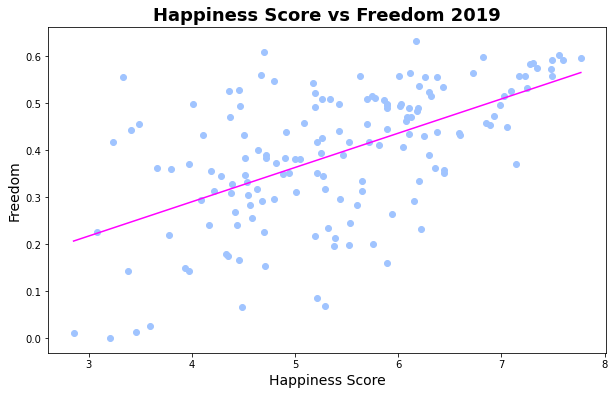

In [77]:
#2019 Freedom
x_value = df2019["Happiness Score"]
y_value = df2019["Freedom"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Freedom 2019", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Freedom", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Freedom 2019.png")
plt.show()


In [78]:
# STATSMODELS Freedom 2019
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freedom   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     72.87
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.24e-14
Time:                        18:02:53   Log-Likelihood:                 112.46
No. Observations:                 156   AIC:                            -220.9
Df Residuals:                     154   BIC:                            -214.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0019      0.047     -0.040      0.968      -0.095       0.091
Happiness Score     0.0730      0.009      8.536      0.000       0.056       0.090
==============================================================================
Omnibus:                        2.387   Durbin-Watson:                   2.357
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                2.155
Skew:                          -0.287   Prob(JB):                        0.340
Kurtosis:                       3.034   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.03x + -0.07
The r-squared is: 0.1486974404230758


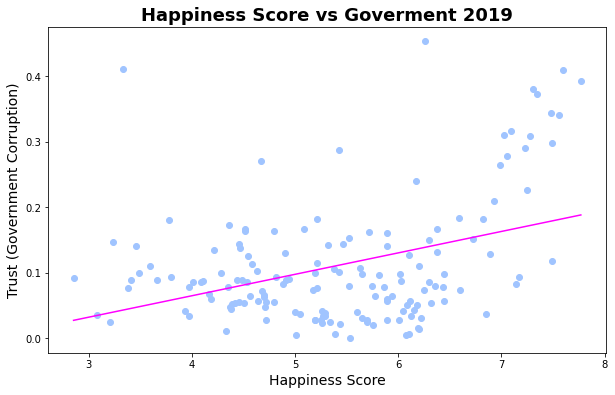

In [79]:
#2019 Government
x_value = df2019["Happiness Score"]
y_value = df2019["Trust (Government Corruption)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Goverment 2019", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Trust (Government Corruption)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Government 2019.png")
plt.show()


In [80]:
# STATSMODELS Goverment 2019
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Trust (Government Corruption)   R-squared:                       0.149
Model:                                       OLS   Adj. R-squared:                  0.143
Method:                            Least Squares   F-statistic:                     26.90
Date:                           Fri, 13 Nov 2020   Prob (F-statistic):           6.65e-07
Time:                                   18:02:53   Log-Likelihood:                 159.67
No. Observations:                            156   AIC:                            -315.3
Df Residuals:                                154   BIC:                            -309.2
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0665      0.035     -1.907      0.058      -0.135       0.002
Happiness Score     0.0328      0.006      5.186      0.000       0.020       0.045
==============================================================================
Omnibus:                       40.388   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.631
Skew:                           1.249   Prob(JB):                     4.60e-16
Kurtosis:                       5.150   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.01x + 0.15
The r-squared is: 0.005749232708879173


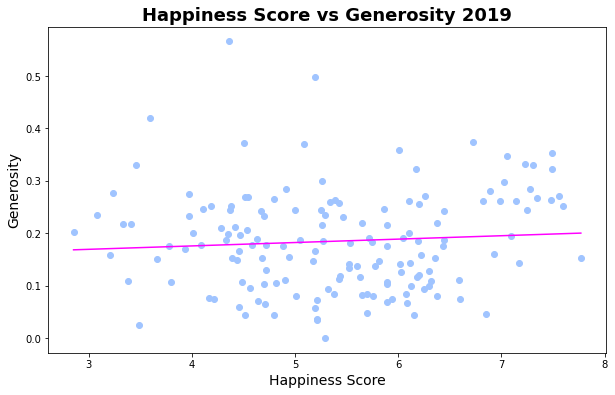

In [81]:
#2019 Generosity
x_value = df2019["Happiness Score"]
y_value = df2019["Generosity"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Generosity 2019", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Generosity", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Generosity 2019.png")
plt.show()


In [82]:
# STATSMODELS Generosity 2019
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8905
Date:                Fri, 13 Nov 2020   Prob (F-statistic):              0.347
Time:                        18:02:53   Log-Likelihood:                 146.38
No. Observations:                 156   AIC:                            -288.8
Df Residuals:                     154   BIC:                            -282.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1498      0.038      3.946      0.000       0.075       0.225
Happiness Score     0.0065      0.007      0.944      0.347      -0.007       0.020
==============================================================================
Omnibus:                       19.548   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.198
Skew:                           0.757   Prob(JB):                     3.38e-06
Kurtosis:                       4.259   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2020 year scatterplot one for each group

In [83]:
df2020 = df.loc[df["Year"] == 2020]

y = 0.08x + 0.47
The r-squared is: 0.6012054591019729


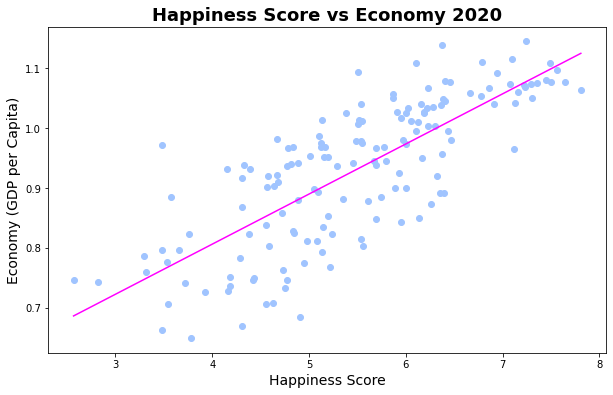

In [84]:
#2020 Economy
x_value = df2020["Happiness Score"]
y_value = df2020["Economy (GDP per Capita)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Economy 2020", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Economy (GDP per Capita)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Economy 2020.png")
plt.show()

In [85]:
# STATSMODELS Economy 2020
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Economy (GDP per Capita)   R-squared:                       0.601
Model:                                  OLS   Adj. R-squared:                  0.599
Method:                       Least Squares   F-statistic:                     227.6
Date:                      Fri, 13 Nov 2020   Prob (F-statistic):           5.98e-32
Time:                              18:02:53   Log-Likelihood:                 177.93
No. Observations:                       153   AIC:                            -351.9
Df Residuals:                           151   BIC:                            -345.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4711      0.031     15.196      0.000       0.410       0.532
Happiness Score     0.0838      0.006     15.088      0.000       0.073       0.095
==============================================================================
Omnibus:                        3.090   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.857
Skew:                          -0.259   Prob(JB):                        0.240
Kurtosis:                       2.576   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.08x + 0.35
The r-squared is: 0.5852261577762634


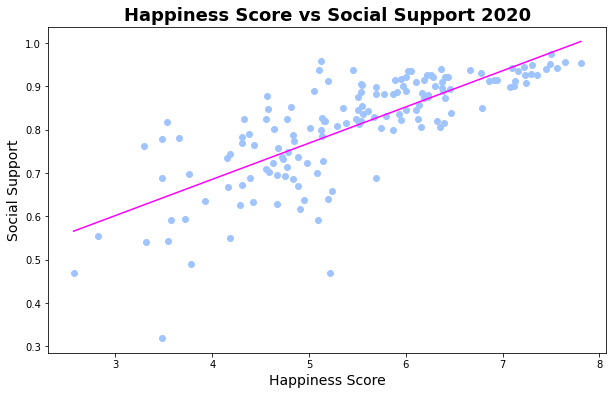

In [86]:
#all year Social Support
x_value = df2020["Happiness Score"]
y_value = df2020["Social Support"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Social Support 2020", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Social Support", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Social Support 2020.png")
plt.show()


In [87]:
# STATSMODELS Social Support 2020
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Social Support   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     213.1
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.18e-30
Time:                        18:02:54   Log-Likelihood:                 173.28
No. Observations:                 153   AIC:                            -342.6
Df Residuals:                     151   BIC:                            -336.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3515      0.032     10.999      0.000       0.288       0.415
Happiness Score     0.0835      0.006     14.596      0.000       0.072       0.095
==============================================================================
Omnibus:                       29.630   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.987
Skew:                          -0.834   Prob(JB):                     1.27e-14
Kurtosis:                       5.693   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.05x + 0.38
The r-squared is: 0.5933871867204707


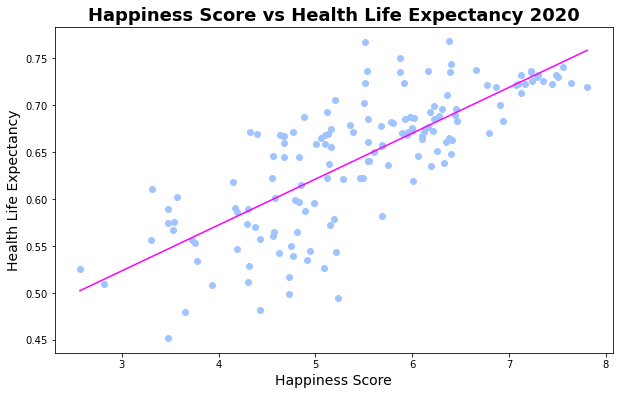

In [88]:
#2020 Life Expectancy
x_value = df2020["Happiness Score"]
y_value = df2020["Health Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Health Life Expectancy 2020", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Health Life Expectancy", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Health 2020.png")
plt.show()


In [89]:
# STATSMODELS Life Expectancy 2020
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Health Life Expectancy   R-squared:                       0.593
Model:                                OLS   Adj. R-squared:                  0.591
Method:                     Least Squares   F-statistic:                     220.4
Date:                    Fri, 13 Nov 2020   Prob (F-statistic):           2.61e-31
Time:                            18:02:54   Log-Likelihood:                 257.85
No. Observations:                     153   AIC:                            -511.7
Df Residuals:                         151   BIC:                            -505.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3769      0.018     20.498      0.000       0.341       0.413
Happiness Score     0.0489      0.003     14.845      0.000       0.042       0.055
==============================================================================
Omnibus:                        2.591   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                2.111
Skew:                          -0.248   Prob(JB):                        0.348
Kurtosis:                       3.292   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.06x + 0.44
The r-squared is: 0.3488045599985105


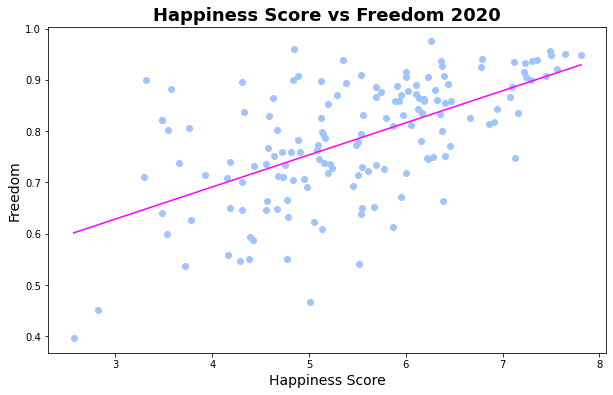

In [90]:
#2020 Freedom
x_value = df2020["Happiness Score"]
y_value = df2020["Freedom"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Freedom 2020", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Freedom", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Freedom 2020.png")
plt.show()


In [91]:
# STATSMODELS Freedom 2020
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freedom   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     80.88
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           9.34e-16
Time:                        18:02:54   Log-Likelihood:                 143.47
No. Observations:                 153   AIC:                            -282.9
Df Residuals:                     151   BIC:                            -276.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4410      0.039     11.357      0.000       0.364       0.518
Happiness Score     0.0625      0.007      8.993      0.000       0.049       0.076
==============================================================================
Omnibus:                        1.721   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.317
Skew:                          -0.202   Prob(JB):                        0.518
Kurtosis:                       3.207   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = -0.07x + 1.09
The r-squared is: 0.17497914602417422


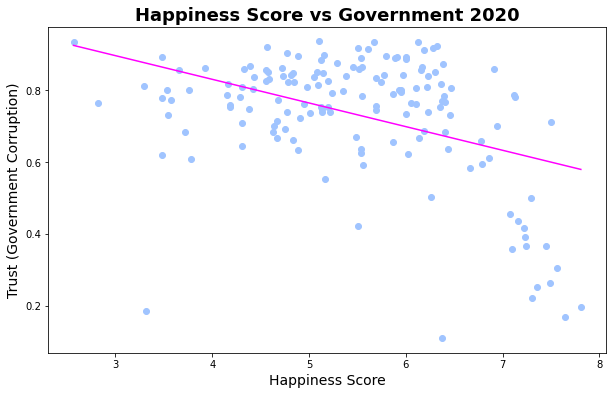

In [92]:
#2020 Government
x_value = df2020["Happiness Score"]
y_value = df2020["Trust (Government Corruption)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Government 2020", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Trust (Government Corruption)", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Government 2020.png")
plt.show()


In [93]:
# STATSMODELS Goverment 2020
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Trust (Government Corruption)   R-squared:                       0.175
Model:                                       OLS   Adj. R-squared:                  0.170
Method:                            Least Squares   F-statistic:                     32.03
Date:                           Fri, 13 Nov 2020   Prob (F-statistic):           7.43e-08
Time:                                   18:02:54   Log-Likelihood:                 64.642
No. Observations:                            153   AIC:                            -125.3
Df Residuals:                                151   BIC:                            -119.2
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0937      0.065     16.824      0.000       0.965       1.222
Happiness Score    -0.0659      0.012     -5.659      0.000      -0.089      -0.043
==============================================================================
Omnibus:                       42.093   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.088
Skew:                          -1.274   Prob(JB):                     6.70e-18
Kurtosis:                       5.431   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 0.01x + -0.07
The r-squared is: 0.004766953326766141


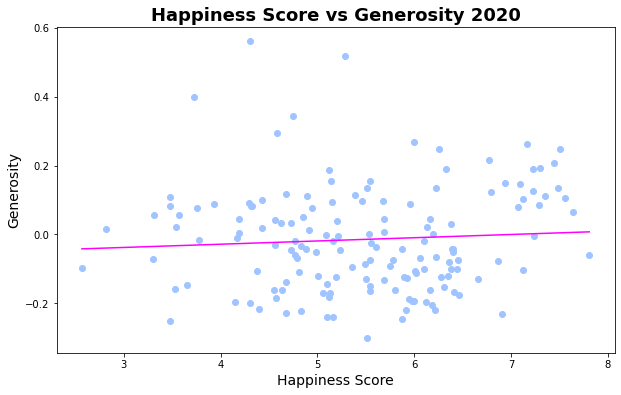

In [94]:
#2020 Generosity
x_value = df2020["Happiness Score"]
y_value = df2020["Generosity"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, color="#A0C4FF")
plt.plot(x_value,regress_values,"r-", color="fuchsia", alpha= 1)
# plt.annotate(line_eq,(2011,550),fontsize=15,color="red")
plt.title("Happiness Score vs Generosity 2020", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Happiness Score", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Generosity", fontsize=14, fontname="DejaVu Sans")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Regressions/Happiness vs Generosity 2020.png")
plt.show()


In [95]:
# STATSMODELS Generosity 2020
X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Generosity   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7233
Date:                Fri, 13 Nov 2020   Prob (F-statistic):              0.396
Time:                        18:02:55   Log-Likelihood:                 72.195
No. Observations:                 153   AIC:                            -140.4
Df Residuals:                     151   BIC:                            -134.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0661      0.062     -1.069      0.287      -0.188       0.056
Happiness Score     0.0094      0.011      0.850      0.396      -0.012       0.031
==============================================================================
Omnibus:                       22.968   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.801
Skew:                           0.862   Prob(JB):                     2.05e-07
Kurtosis:                       4.364   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Regressions

In [96]:
corrs

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
Happiness Rank,1.000000,-0.990833,-0.763578,-0.598096,-0.715281,-0.407598,-0.099219,-0.077762,-0.014098
Happiness Score,-0.990833,1.000000,0.758065,0.596504,0.714334,0.428059,0.120140,0.085193,0.024733
Economy (GDP per Capita),-0.763578,0.758065,1.000000,0.562203,0.788344,0.260146,0.116349,-0.024282,0.022661
Social Support,-0.598096,0.596504,0.562203,1.000000,0.530745,0.077413,-0.238660,0.145405,0.059392
Health Life Expectancy,-0.715281,0.714334,0.788344,0.530745,1.000000,0.282518,0.127792,-0.024909,0.131613
Freedom,-0.407598,0.428059,0.260146,0.077413,0.282518,1.000000,0.695468,-0.212523,0.450416
Trust (Government Corruption),-0.099219,0.120140,0.116349,-0.238660,0.127792,0.695468,1.000000,-0.437519,0.539995
Generosity,-0.077762,0.085193,-0.024282,0.145405,-0.024909,-0.212523,-0.437519,1.000000,-0.471270
Year,-0.014098,0.024733,0.022661,0.059392,0.131613,0.450416,0.539995,-0.471270,1.000000


In [97]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social Support', 'Health Life Expectancy',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [98]:
x_value = df[['Economy (GDP per Capita)', 'Social Support', 'Health Life Expectancy',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]
y_value = df["Happiness Score"]

X = sm.add_constant(x_value)
Y = y_value
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     390.1
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          1.44e-249
Time:                        18:02:55   Log-Likelihood:                -846.18
No. Observations:                 934   AIC:                             1706.
Df Residuals:                     927   BIC:                             1740.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.0161      0.084     24.034      0.000       1.852       2.181
Economy (GDP per Capita)          1.2495      0.090     13.900      0.000       1.073       1.426
Social Support                    0.6589      0.084      7.855      0.000       0.494       0.824
Health Life Expectancy            1.0139      0.143      7.076      0.000       0.733       1.295
Freedom                           1.8870      0.147     12.874      0.000       1.599       2.175
Trust (Government Corruption)    -0.4468      0.129     -3.456      0.001      -0.700      -0.193
Generosity                        0.7356      0.143      5.127      0.000       0.454       1.017
==============================================================================
Omnibus:                       23.312   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.811
Skew:                          -0.339   Prob(JB):                     2.48e-06
Kurtosis:                       3.450   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
predictions = results.predict()
resids = y_value-predictions
print(resids)

0      0.695621
1      0.588533
2      0.811027
3      0.552528
4      0.579916
         ...   
929   -0.908305
930   -2.287457
931   -1.693916
932   -1.531915
933   -1.485060
Name: Happiness Score, Length: 934, dtype: float64


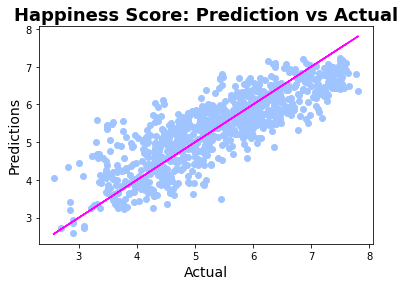

In [100]:
plt.scatter(y_value, predictions, color="#A0C4FF")
plt.plot(y_value,y_value, color="fuchsia", alpha= 1)
plt.title("Happiness Score: Prediction vs Actual", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Actual", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Predictions", fontsize=14, fontname="DejaVu Sans")
plt.savefig("Images/Regressions/Multi Var1.png")

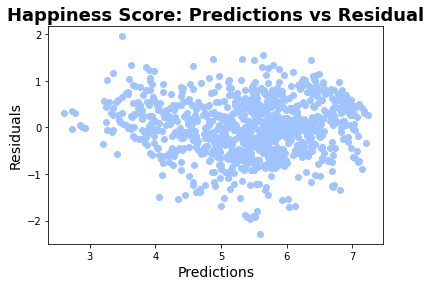

In [101]:
plt.scatter(predictions, resids, color="#A0C4FF")
plt.title("Happiness Score: Predictions vs Residual", fontsize=18, fontweight="bold", fontname = "DejaVu Sans")
plt.xlabel("Predictions", fontsize=14, fontname="DejaVu Sans")
plt.ylabel("Residuals", fontsize=14, fontname="DejaVu Sans")
plt.savefig("Images/Regressions/Multi Var2.png")

In [102]:
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [103]:
reg = LinearRegression()
reg.fit(x_value, y_value)
reg.coef_

array([ 1.24945471,  0.65888826,  1.01389344,  1.88697202, -0.44675616,
        0.735618  ])

In [104]:
fakeData = [[1.8, .2, 0.9, .8, .6, .2]]

In [105]:
reg.predict(fakeData)

array([6.69807495])